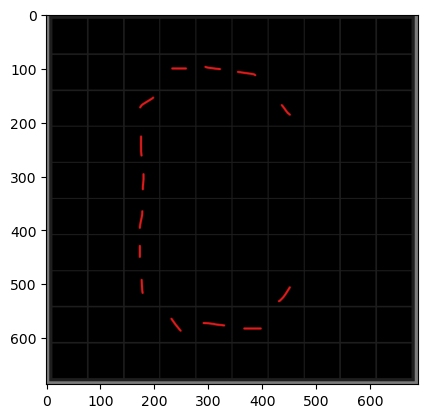

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

LETTER_FOLDER = "./letters/"
A_FILENAME = "C.png"
letter_img = cv2.imread(LETTER_FOLDER + A_FILENAME)
letter_img_rgb = cv2.cvtColor(letter_img, cv2.COLOR_BGR2RGB)
letter_img_hsv = cv2.cvtColor(letter_img_rgb, cv2.COLOR_RGB2HSV)

plt.imshow(letter_img_rgb)
plt.show()

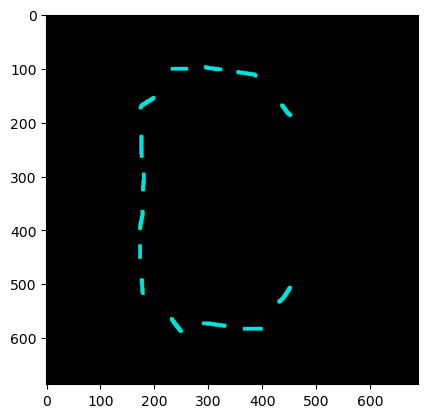

In [3]:
n = 4
kernel = np.ones((n, n), np.uint8)

red_mask = cv2.inRange(letter_img_hsv, (0, 50, 50), (15, 255,255))
red_threshold_img = cv2.bitwise_and(letter_img_hsv, letter_img_hsv, mask=red_mask)
dilation = cv2.dilate(red_threshold_img, kernel, iterations = 1)

plt.imshow(dilation)
plt.show()

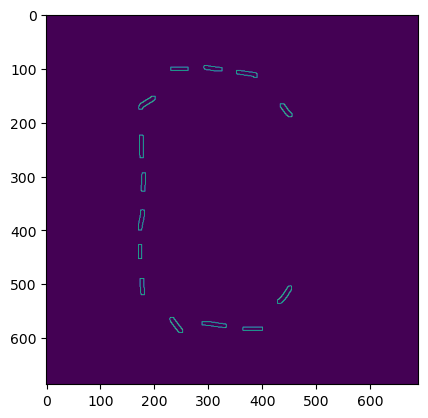

8 5
8 4
8 3
7 6
7 2
6 2
5 2
4 2
3 2
2 6
2 2
1 5
1 3
1 4


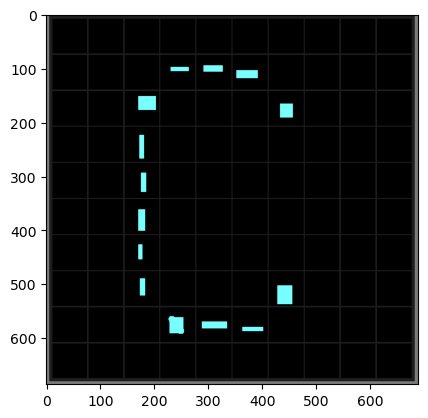

In [12]:
edges = cv2.Canny(dilation, threshold1 = 50, threshold2 = 100, apertureSize = 3)
plt.imshow(edges)
plt.show()
img2, contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_height, img_width, _channels = letter_img_rgb.shape
coords = []

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    #cv2.rectangle(letter_img_rgb,(x,y),(x+w,y+h),(120,255,255),-1)
    m = cv2.moments(cnt)
    pixel_col = int(m["m10"] / m["m00"]) # col
    pixel_row = int(m["m01"] / m["m00"]) # row
    
    grid_row = math.floor(pixel_row / img_height * 10)
    grid_col = math.floor(pixel_col / img_width * 10)
    
    print(grid_row, grid_col)
    coords.append([grid_row, grid_col])
    
plt.imshow(letter_img_rgb)
plt.show()

In [23]:
print(f"// {A_FILENAME.split(".")[0]}")
print("{{", end='')
for r in range(10):
    if r != 0:
        print(" {", end='')
    for c in range(10):
        if [r, c] in coords:
            print("1, ", end='')
        else:
            print("0, ", end='')
    if r != 9:
        print("},\t//" + str(r))
    else:
        print("}}\t//9")
print()

// C.png
{{0, 0, 0, 0, 0, 0, 0, 0, 0, 0, },	//0
 {0, 0, 0, 1, 1, 1, 0, 0, 0, 0, },	//1
 {0, 0, 1, 0, 0, 0, 1, 0, 0, 0, },	//2
 {0, 0, 1, 0, 0, 0, 0, 0, 0, 0, },	//3
 {0, 0, 1, 0, 0, 0, 0, 0, 0, 0, },	//4
 {0, 0, 1, 0, 0, 0, 0, 0, 0, 0, },	//5
 {0, 0, 1, 0, 0, 0, 0, 0, 0, 0, },	//6
 {0, 0, 1, 0, 0, 0, 1, 0, 0, 0, },	//7
 {0, 0, 0, 1, 1, 1, 0, 0, 0, 0, },	//8
 {0, 0, 0, 0, 0, 0, 0, 0, 0, 0, }}	//9

